In [5]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Laden der Daten
ai_data = pd.read_csv('ai_labelled.csv')
human_data = pd.read_csv('human_labelled.csv', sep=';')

# Hinzufügen einer Spalte, um den Autor zu kennzeichnen
ai_data['Autor'] = 'KI'
human_data['Autor'] = 'Mensch'

# Zusammenführen der Daten
data = pd.concat([ai_data, human_data])

# Umwandeln der Daten in ein langes Format für die ANOVA
melted_data = pd.melt(data, id_vars=['Autor'], value_vars=[
    'Geld - 2. Wie glaubwürdig fanden Sie den Text ?',
    'Gesundheit - 2. Wie glaubwürdig fanden Sie den Text ?',
    'Sport - 2. Wie glaubwürdig fanden Sie den Text ?',
    'Wissen - 2. Wie glaubwürdig fanden Sie den Text ?'
], var_name='Thema', value_name='Glaubwürdigkeit')

# ANOVA durchführen
model = ols('Glaubwürdigkeit ~ C(Autor) + C(Thema) + C(Autor):C(Thema)', data=melted_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                       sum_sq     df         F    PR(>F)
C(Autor)            10.899209    1.0  5.389001  0.021750
C(Thema)            15.833333    3.0  2.609543  0.054084
C(Autor):C(Thema)    1.764190    3.0  0.290762  0.832014
Residual           275.058824  136.0       NaN       NaN


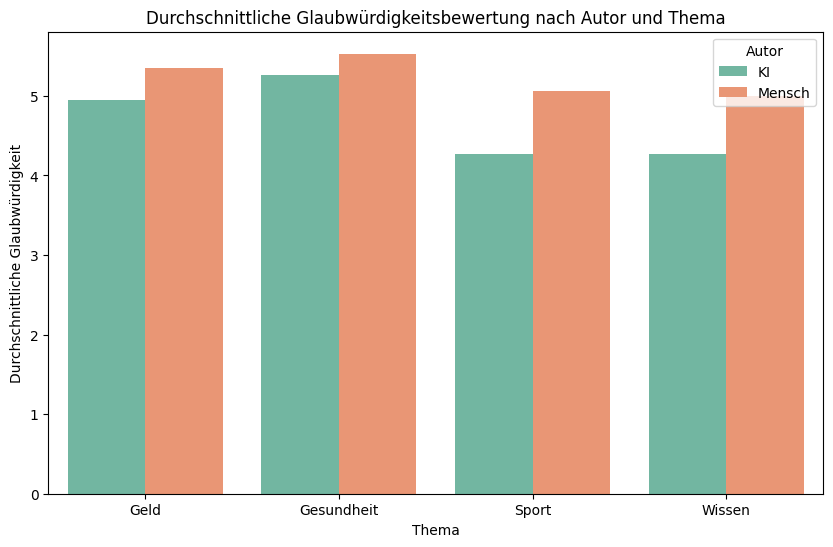

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Laden der Daten
ai_data = pd.read_csv('ai_labelled.csv')
human_data = pd.read_csv('human_labelled.csv', sep=';')
# Hinzufügen einer Spalte, um den Autor zu kennzeichnen
ai_data['Autor'] = 'KI'
human_data['Autor'] = 'Mensch'

# Zusammenführen der Daten
data = pd.concat([ai_data, human_data])

# Umwandeln der Daten in ein langes Format für die Visualisierung
melted_data = pd.melt(data, id_vars=['Autor'], value_vars=[
    'Geld - 2. Wie glaubwürdig fanden Sie den Text ?',
    'Gesundheit - 2. Wie glaubwürdig fanden Sie den Text ?',
    'Sport - 2. Wie glaubwürdig fanden Sie den Text ?',
    'Wissen - 2. Wie glaubwürdig fanden Sie den Text ?'
], var_name='Thema', value_name='Glaubwürdigkeit')

# Extrahieren des Themas aus der Variablennamen
melted_data['Thema'] = melted_data['Thema'].str.extract(r'(Geld|Gesundheit|Sport|Wissen)')

# Berechnung der durchschnittlichen Glaubwürdigkeit pro Autor und Thema
average_ratings = melted_data.groupby(['Autor', 'Thema'], as_index=False)['Glaubwürdigkeit'].mean()

# Erstellen der Grafik
plt.figure(figsize=(10, 6))
sns.barplot(x='Thema', y='Glaubwürdigkeit', hue='Autor', data=average_ratings, palette='Set2')

# Titel und Labels hinzufügen
plt.title('Durchschnittliche Glaubwürdigkeitsbewertung nach Autor und Thema')
plt.xlabel('Thema')
plt.ylabel('Durchschnittliche Glaubwürdigkeit')
plt.legend(title='Autor')

# Anzeigen der Grafik
plt.show()

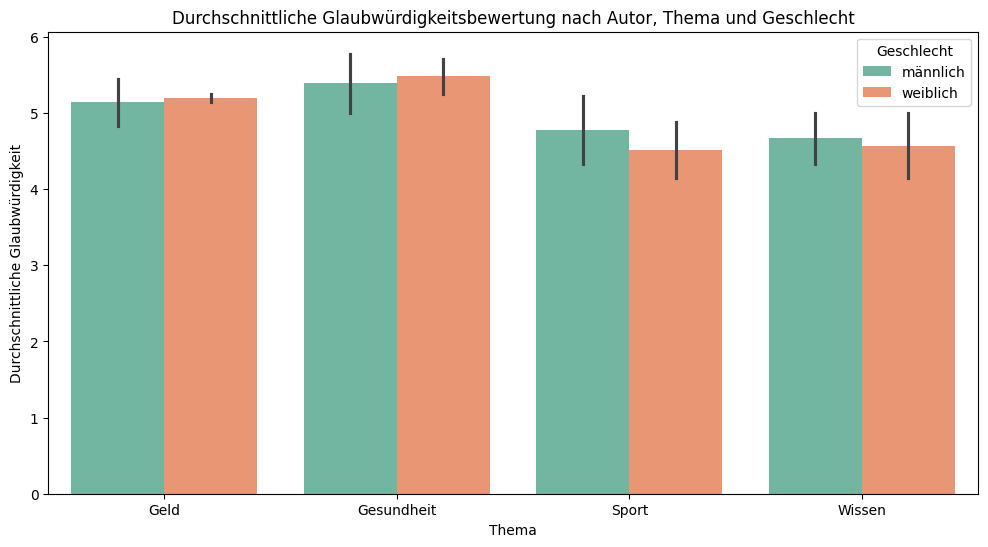

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Laden der Daten
ai_data = pd.read_csv('ai_labelled.csv')
human_data = pd.read_csv('human_labelled.csv', sep=';')

# Hinzufügen einer Spalte, um den Autor zu kennzeichnen
ai_data['Autor'] = 'KI'
human_data['Autor'] = 'Mensch'

# Zusammenführen der Daten
data = pd.concat([ai_data, human_data])

# Umwandeln der Daten in ein langes Format für die Visualisierung
melted_data = pd.melt(data, id_vars=['Autor', 'Geben Sie ihr Geschlecht an.'], value_vars=[
    'Geld - 2. Wie glaubwürdig fanden Sie den Text ?',
    'Gesundheit - 2. Wie glaubwürdig fanden Sie den Text ?',
    'Sport - 2. Wie glaubwürdig fanden Sie den Text ?',
    'Wissen - 2. Wie glaubwürdig fanden Sie den Text ?'
], var_name='Thema', value_name='Glaubwürdigkeit')

# Extrahieren des Themas aus der Variablennamen
melted_data['Thema'] = melted_data['Thema'].str.extract(r'(Geld|Gesundheit|Sport|Wissen)')

# Berechnung der durchschnittlichen Glaubwürdigkeit pro Autor, Thema und Geschlecht
average_ratings = melted_data.groupby(['Autor', 'Thema', 'Geben Sie ihr Geschlecht an.'], as_index=False)['Glaubwürdigkeit'].mean()

# Erstellen der Grafik
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Thema', 
    y='Glaubwürdigkeit', 
    hue='Geben Sie ihr Geschlecht an.',  # Unterscheidung nach Geschlecht
    palette='Set2',  # Farbpalette
    data=average_ratings,
    dodge=True  # Balken nebeneinander darstellen
)

# Titel und Labels hinzufügen
plt.title('Durchschnittliche Glaubwürdigkeitsbewertung nach Autor, Thema und Geschlecht')
plt.xlabel('Thema')
plt.ylabel('Durchschnittliche Glaubwürdigkeit')
plt.legend(title='Geschlecht')

# Anzeigen der Grafik
plt.show()

C:\Users\Ludwig\AppData\Local\Temp\ipykernel_17840\1243507773.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ai_glaubwuerdigkeit['Durchschnitt'] = ai_glaubwuerdigkeit.mean(axis=1)
C:\Users\Ludwig\AppData\Local\Temp\ipykernel_17840\1243507773.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_glaubwuerdigkeit['Durchschnitt'] = human_glaubwuerdigkeit.mean(axis=1)


Durchschnittliche Glaubwürdigkeit (AI): 4.617543859649123
Durchschnittliche Glaubwürdigkeit (Mensch): 5.094117647058824


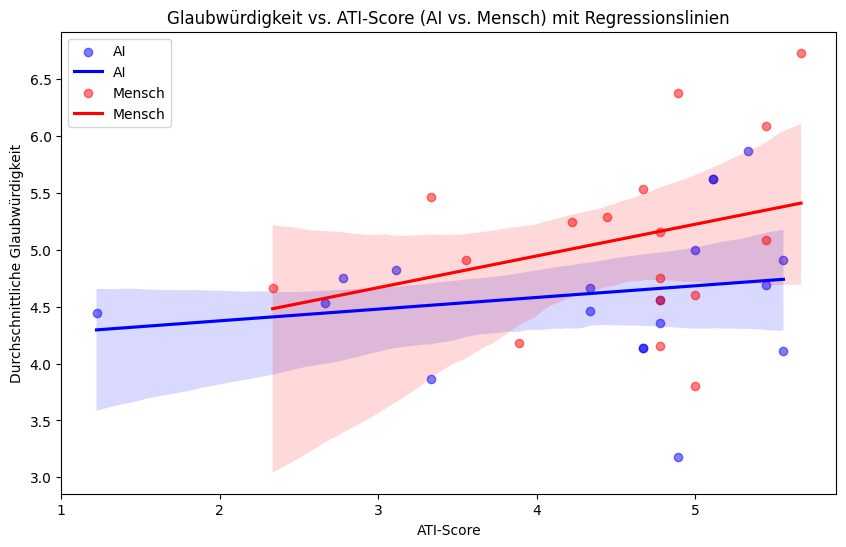

Korrelation zwischen Glaubwürdigkeit und ATI (AI): 0.18969672995291836
Korrelation zwischen Glaubwürdigkeit und ATI (Mensch): 0.29934682446012795


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Daten laden
ai_data = pd.read_csv('ai_labelled_with_ati.csv')
human_data = pd.read_csv('human_labelled_with_ati.csv')

# Relevante Spalten extrahieren
ai_glaubwuerdigkeit = ai_data[['Geld - 2. Wie glaubwürdig fanden Sie den Text ?', 
                               'Gesundheit - 2. Wie glaubwürdig fanden Sie den Text ?', 
                               'Sport - 2. Wie glaubwürdig fanden Sie den Text ?', 
                               'Wissen - 2. Wie glaubwürdig fanden Sie den Text ?', 
                               'ATI_Score']]

human_glaubwuerdigkeit = human_data[['Geld - 2. Wie glaubwürdig fanden Sie den Text ?', 
                                     'Gesundheit - 2. Wie glaubwürdig fanden Sie den Text ?', 
                                     'Sport - 2. Wie glaubwürdig fanden Sie den Text ?', 
                                     'Wissen - 2. Wie glaubwürdig fanden Sie den Text ?', 
                                     'ATI_Score']]

# Durchschnittliche Glaubwürdigkeit berechnen
ai_glaubwuerdigkeit['Durchschnitt'] = ai_glaubwuerdigkeit.mean(axis=1)
human_glaubwuerdigkeit['Durchschnitt'] = human_glaubwuerdigkeit.mean(axis=1)

# Vergleich der durchschnittlichen Glaubwürdigkeit
print("Durchschnittliche Glaubwürdigkeit (AI):", ai_glaubwuerdigkeit['Durchschnitt'].mean())
print("Durchschnittliche Glaubwürdigkeit (Mensch):", human_glaubwuerdigkeit['Durchschnitt'].mean())

# Streudiagramm mit Regressionslinien
plt.figure(figsize=(10, 6))

# AI-Daten
sns.regplot(x='ATI_Score', y='Durchschnitt', data=ai_glaubwuerdigkeit, 
            scatter_kws={'color': 'blue', 'alpha': 0.5}, 
            line_kws={'color': 'blue', 'label': 'AI'}, 
            label='AI')

# Mensch-Daten
sns.regplot(x='ATI_Score', y='Durchschnitt', data=human_glaubwuerdigkeit, 
            scatter_kws={'color': 'red', 'alpha': 0.5}, 
            line_kws={'color': 'red', 'label': 'Mensch'}, 
            label='Mensch')

plt.xlabel('ATI-Score')
plt.ylabel('Durchschnittliche Glaubwürdigkeit')
plt.title('Glaubwürdigkeit vs. ATI-Score (AI vs. Mensch) mit Regressionslinien')
plt.legend()
plt.show()

# Korrelationen berechnen
ai_korrelation = ai_glaubwuerdigkeit['Durchschnitt'].corr(ai_glaubwuerdigkeit['ATI_Score'])
human_korrelation = human_glaubwuerdigkeit['Durchschnitt'].corr(human_glaubwuerdigkeit['ATI_Score'])

print("Korrelation zwischen Glaubwürdigkeit und ATI (AI):", ai_korrelation)
print("Korrelation zwischen Glaubwürdigkeit und ATI (Mensch):", human_korrelation)